In [3]:
inputs = [ 1 ,2 , 3 , 4 ]
weights = [ 0.2 , 0.1 ,0.8  , -0.2]

bias = 3

output = (inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias)

print(output)

5.0


### layer of neurons

In [4]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1] ,
           [0.5, -0.91, 0.26, -0.5] ,
           [-0.26, -0.27, 0.17, 0.87]]

weight1 = weights[0]
weight2 = weights[1]
weight3 = weights[2]


bias = [2, 3, 0.5]

outputs = [[ (inputs[0]*weight1[0] + inputs[1]*weight1[1] + inputs[2]*weight1[2] + inputs[3]*weight1[3] + bias[0]) ] ,
           [ (inputs[0]*weight2[0] + inputs[1]*weight2[1] + inputs[2]*weight2[2] + inputs[3]*weight2[3] + bias[1]) ],
           [ (inputs[0]*weight3[0] + inputs[1]*weight3[1] + inputs[2]*weight3[2] + inputs[3]*weight3[3] + bias[2]) ] ]
           
print(outputs)


[[4.8], [1.21], [2.385]]


## using loops 

In [5]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

bias = [2, 3, 0.5]

output_layer = []

for neuron_weight, neuron_bias in zip(weights, bias):
    neuron_output = 0
    for neuron_input, weight in zip(inputs, neuron_weight):
        neuron_output += neuron_input * weight
    neuron_output += neuron_bias
    output_layer.append(neuron_output)

print(output_layer)



[4.8, 1.21, 2.385]


## using numpy

In [6]:
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

inputs_array = np.array(inputs)
weights_array = np.array(weights)

output = np.dot(weights_array , inputs_array ) + bias
print(output)

4.8


### layers of neurons using numpy

In [7]:
import numpy as np

inputs = [[1.0, 2.0, 3.0, 2.5] ,
           [2.0, 5.0, -1.0, 2.0], 
          [-1.5, 2.7, 3.3, -0.8] ]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

inputs_array = np.array(inputs)
weights_array = np.array(weights)
bias_array = np.array(biases)
weights2_array = np.array(weights2)
biases2_array = np.array(biases2)


layer1_output = np.dot( inputs_array ,weights_array.T ) + bias_array
layer2_output = np.dot( layer1_output ,weights2_array.T ) + biases2_array

print(layer2_output)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


### generating non linear data



In [8]:
!pip install nnfs


In [9]:
!pip install matplotlib


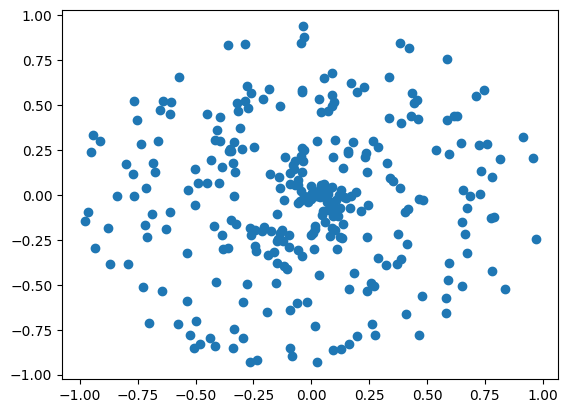

In [2]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X ,y = spiral_data(samples=100 , classes=3)
plt.scatter(X[: , 0] , X[: ,1])
plt.show()



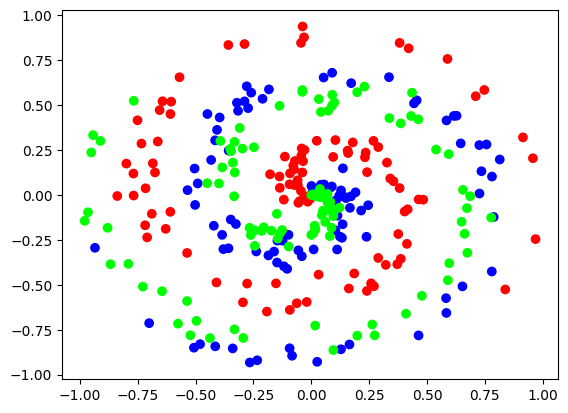

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()


### layer dense class

In [12]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class layer_dense:
    def __init__(self, n_inputs , n_neurons):
        self.weights = 0.01*np.random.randn(n_inputs , n_neurons)
        self.biases = np.zeros((1,n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs , self.weights) + self.biases

X , y = spiral_data(samples=100 , classes=3)

dense1 = layer_dense(2,3)
dense1.forward(X)

print(dense1.output[:5])


[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


## activation relu class


In [13]:
class activation_reLU:
    def forward(self , inputs):
     self.outputs = np.maximum(0,inputs)



In [14]:
X , y = spiral_data(samples=100 , classes =3 )
dense1 = layer_dense(2,3)
activation1 = activation_reLU()
dense1.forward(X)
activation1.forward(dense1.output)
print(activation1.outputs[:5])

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### ACTIVATION FUNCTION: SOFTMAX

In [15]:
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8,9]]
# 0 is for rows , 1 for column
print(np.sum(A , axis = 1 ))
print(np.sum(A , axis = 1 ).shape)
print(np.sum(A , axis = 1 , keepdims= True).shape)

[ 6 15 24]
(3,)
(3, 1)


In [16]:
# softmax activation 
class softmax_act:
    def forward(self, inputs):
        exp_values = np.exp(inputs-np.max(inputs , axis = 1 , keepdims = True))
        probabilities = exp_values/np.sum(exp_values , axis = 1 , keepdims = True)
        self.output = probabilities
       
    

In [17]:
X , y = spiral_data(samples = 100 , classes = 3)
dense1 = layer_dense(2,3)
activation1 = activation_reLU()
dense2 = layer_dense(3,3)
activation2 = softmax_act()
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.outputs)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333364 0.3333334  0.3333329 ]
 [0.33333385 0.33333346 0.33333266]
 [0.33333433 0.3333336  0.3333321 ]
 [0.33333465 0.33333373 0.33333164]]


###  CROSS ENTROPY LOSS BUILDING BLOCKS IN PYTHON

In [18]:
import numpy as np
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
# case 1 : class targets are just numbers
class_targets = [0, 1, 1]
# advance indexing
print(softmax_outputs[[0,1,2] , class_targets])

[0.7 0.5 0.9]


In [19]:
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)) , class_targets])
print(neg_log)
average_loss = np.mean(neg_log)
print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


### one hot encoded data

In [20]:
true = np.array([[1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]])

pred = np.array([ [0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])

true*pred

array([[0.7, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0.9, 0. ]])

In [21]:
class loss:
    def calculate(self, outputs , y):
        samples_losses = self.forward(outputs , y)
        data_loss = np.mean(samples_losses)
        return data_loss

### CATEGORICAL CROSS ENTROPY CLASS


In [22]:
class Loss_catentropy(loss):
    def forward(self , pred , true):
        # no of samples :
        samples = len(pred)
        # to avoid exact 0 and 1
        clipped_pred = np.clip(pred , 1e-7 , 1-1e-7)
        if len(true.shape) == 1 :
            correct_confidence = clipped_pred[range(samples) , true]
        elif len(true.shape) == 2 :
            correct_confidence = np.sum(clipped_pred*true , axis=1)
        neg_log = -np.log(correct_confidence) 
        return neg_log

In [23]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = np.array([[1, 0, 0],
 [0, 1, 0],
 [0, 1, 0]])

loss_fn = Loss_catentropy()
loss = loss_fn.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


### full code


In [24]:
X, y = spiral_data(samples=100, classes=3)
dense1 = layer_dense(2,3)
activation1 = activation_reLU()
dense2 = layer_dense(3,3)
activation2 = softmax_act()
loss_fn = Loss_catentropy()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.outputs)
activation2.forward(dense2.output)
print(activation2.output[:5])

loss = loss_fn.calculate(activation2.output , y)
print("loss: " , loss)


# accuracy :
predictions = np.argmax( activation2.output , axis=1 )
if len(y.shape)==2 :
    y= np.argmax(y , axis=1)
accuracy = np.mean(predictions == y)
print("acc:" , accuracy)


[[0.33333334 0.33333334 0.33333334]
 [0.3333341  0.333333   0.3333329 ]
 [0.33333406 0.333333   0.33333293]
 [0.3333341  0.33333296 0.33333293]
 [0.3333364  0.33333203 0.33333158]]
loss:  1.0986193
acc: 0.28


In [25]:
# accuracy :
import numpy as np

softmax_outputs = np.array([[0.7, 0.2, 0.1],
 [0.5, 0.1, 0.4],
 [0.02, 0.9, 0.08]])

class_targets = np.array([0, 1, 1])
predictions = np.argmax(softmax_outputs , axis=1)
# if one hot encoded change them
if len(class_targets.shape) == 2 :
    class_targets = np.argmax( class_targets , axis = 1)
    
accuracy = np.mean(predictions == class_targets) 
print(accuracy)

0.6666666666666666


### backpropagation

In [26]:
# randomly selecting weights and biases - does not work
import nnfs
from nnfs.datasets import vertical_data
X , y = vertical_data(samples=100 , classes=3)
dense1 = layer_dense(2,3)
activation1 = activation_reLU()
dense2= layer_dense(3,3)
activation2= softmax_act()
loss_fn = Loss_catentropy()
#  some initial value
lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for it in range(200000):
    dense1.weights = 0.05*np.random.randn(2,3)
    dense1.biases = 0.05*np.random.randn(1,3)
    dense2.weights = 0.05*np.random.randn(3,3)
    dense2.biases = 0.05*np.random.randn(1,3)
    
# forward pass:
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.outputs)
activation2.forward(dense2.output)
loss=loss_fn.calculate(activation2.output , y)

predictions = np.argmax(activation2.output , axis=1)
accuracy = np.mean(predictions==y)

if loss<lowest_loss:
    print('new set of weights found at iteration: ' , it , "loss:" , loss , "accuracy:" , accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss

new set of weights found at iteration:  199999 loss: 1.0977256 accuracy: 0.3333333333333333


In [27]:
# randomly adjusting weights and biases - works better but not for every type of data
import nnfs
from nnfs.datasets import vertical_data
X , y = vertical_data(samples=100, classes=3)
dense1 = layer_dense(2,3)
activation1= activation_reLU()
dense2=layer_dense(3,3)
activation2= softmax_act()
loss_function= Loss_catentropy()
lowest_loss=999999
best_dense1_weights= dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iter in range(10000):
    dense1.weights += 0.05*np.random.randn(2,3)
    dense1.biases += 0.05*np.random.randn(1,3)
    dense2.weights += 0.05*np.random.randn(3,3)
    dense2.biases += 0.05*np.random.randn(1,3)

# forward pass:
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.outputs)
activation2.forward(dense2.output)

 # it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output , y)

predictions = np.argmax(activation2.output , axis=1)
accuracy = np.mean(predictions==y)

if loss<lowest_loss:
    print("new set of weights found: at iteration: " , iter , "loss:" , loss , "accuracy:"  , accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss

else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

new set of weights found: at iteration:  9999 loss: 5.3053994 accuracy: 0.3333333333333333


### backpropagation


bcs the earlier methods didnt work we use backpropagation 

 we have to find gradients of the loss with respect to weights and biases

### gradients of loss wrt weights

In [28]:
#  dvalues= dl/dz 
# dl/dw11 = dl/dy*dy/da1*da1/dz1*dz1/dw11
# dl/dy*dy/da1*da1/dz1 = dl/dz
# dz1/dw11 = x1
# finally dl/dw11 = dl/dz*x1
# eg :batch of input is a matrix of 3x4
# batch of dl/dz is a matrix of 3x3 
# for multiplication of both take input transpose
import numpy as np
dvalues = np.array([[1., 1., 1.],
 [2., 2., 2.],
 [3., 3., 3.]])

inputs = np.array([[1, 2, 3, 2.5],
 [2., 5., -1., 2],
 [-1.5, 2.7, 3.3, -0.8]])

dweights = np.dot(inputs.T , dvalues)
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


### gradients of loss with respect to biases 

In [29]:
# dl/db = sum of dl/dz (axis = 0 )
# keepdims = true (IMPPP)

dvalues = np.array([[1., 1., 1.],
 [2., 2., 2.],
 [3., 3., 3.]])

biases = np.array([[2, 3, 0.5]])

dbiases = np.sum(dvalues , axis= 0 , keepdims = True)
print(dbiases)

[[6. 6. 6.]]


### gradients of loss with respect to inputs

In [30]:
dvalues = np.array([[1., 1., 1.],
 [2., 2., 2.],
 [3., 3., 3.]])

# we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]).T

dinputs = np.dot(dvalues , weights.T)
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


#### backward method in layer dense class

In [31]:
# class layer dense

# class layer_dense:
#     def backward(self, dvalues):
#         self.dweights=np.dot(self.inputs.T , dvalues)
#         self.dbiases= np.sum(dvalues , axis=0 , keepdims=True)
#         self.dinputs= np.dot(dvalues , self.weights.T)

In [32]:
class Loss:
    def calculate(self, output , y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss

In [33]:
class Loss_CategoricalCrossentropy(Loss):
    def forward(self , y_pred, y_true):
        samples = len(y_pred)
        # clip data to prevent division by zero
        y_pred_clipped = np.clip(y_pred , 1e-7 , 1-1e-7)

        if len(y_true.shape) ==1:
            correct_confidences = y_pred_clipped[
            range(samples),
            y_true
            ]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    def backward(self , dvalues , y_true):
      samples = len(dvalues)
      labels = len(dvalues[0])

      if len(y_true.shape) == 1:
          y_true = np.eye(labels)[y_true]

       
      self.dinputs = -y_true/dvalues 
      self.dinputs = self.dinputs/samples

### Softmax classifier - combined Softmax activation and cross-entropy loss for faster backward step

In [34]:
class Activation_softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = softmax_act()
        self.loss = Loss_CategoricalCrossentropy()
    def forward(self , inputs , y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output , y_true)

    def backward(self , dvalues , y_true):
        samples = len(dvalues)
        if len(y_true.shape)==2:
            y_true = np.argmax(y_true , axis=1)
            
        self.dinputs = dvalues.copy()
        # self.dinputs[row, col]
        self.dinputs[range(samples) , y_true] -=1
        self.dinputs = self.dinputs / samples
        

In [35]:
# eg:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = np.array([1, 0, 2])
softmax_loss = Activation_softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs,class_targets)
dvalues1 = softmax_loss.dinputs
print('gradients: combined loss and activation:')
print('dinputs:\n' , dvalues1)
print(dvalues1.shape)
print(dvalues1.ndim)

gradients: combined loss and activation:
dinputs:
 [[ 0.23333333 -0.3         0.06666667]
 [-0.3         0.16666667  0.13333333]
 [ 0.00666667  0.3        -0.30666667]]
(3, 3)
2


<div class="alert alert-block alert-success">
<b>all final classes </b> 
   <br> 1.creating layers - forward and backward</br>
   <br> 2. relu for and back</br>
   <br> 3. combined loss and softmax</br>
</div>

<div class="alert alert-block alert-info">
<b>creating layers:</b> 
</div>

In [36]:
class layer_dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from input ones, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

### FULL CODE UPTO THIS POINT: FORWARD AND BACKWARD PASS




In [37]:
# ReLU activation
class activation_reLU:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.outputs = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify the original variable,
        # let’s make a copy of values first
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


In [38]:
# Softmax activation
class softmax_act:
 # Forward pass
 def forward(self, inputs):
 # Get unnormalized probabilities
  exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
 # Normalize them for each sample
  probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
  self.output = probabilities

In [39]:
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

In [40]:
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [41]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [42]:
X , y = spiral_data(samples = 100 , classes = 3)
dense1 = layer_dense(2,3)
activation1= activation_reLU()
dense2=layer_dense(3,3)
activation2= softmax_act()
loss_function= Activation_softmax_Loss_CategoricalCrossentropy()
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.outputs)
loss = loss_function.forward(dense2.output , y)
print(loss_function.output [:5])
print("loss:" , loss)
predictions = np.argmax(loss_function.output , axis = 1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
print("acc:" , accuracy)
loss_function.backward(loss_function.output , y)
dense2.backward(loss_function.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)
print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
loss: 1.0986106
acc: 0.3433333333333333
[[-1.6670371e-04  1.0321622e-04 -2.0066132e-04]
 [-8.7357657e-05  3.4617243e-04  1.3973871e-04]]
[[ 0.00072105 -0.00068013  0.00089618]]
[[ 2.2784691e-06  2.2529066e-04 -2.2756912e-04]
 [-5.5110802e-05  3.3885476e-04 -2.8374395e-04]
 [ 5.1431638e-05  1.3132016e-04 -1.8275180e-04]]
[[ 2.2078049e-05 -1.6230857e-05 -6.1579049e-06]]


In [43]:
import numpy as np
weights = np.array([-3.0, -1.0, 2.0])
bias = 1.0
inputs = np.array([1.0, -2.0, 3.0])
target_output = 0.0
learning_rate = 0.001
def relu(x):
    return np.maximum(0,x)
def relu_derivative(x):
    return np.where(x>0 ,1.0 , 0.0)

for iteration in range(200):
    # forward pass:
    linear_output = np.dot(weights , inputs) + bias
    output = relu(linear_output)
    loss = (output - target_output)**2
    # backward pass:
    dloss_doutput = 2*(output - target_output)
    doutput_dlinear = relu_derivative(linear_output)
    dlinear_dweights = inputs
    dlinear_dbias = 1

    dloss_dlinear = dloss_doutput*doutput_dlinear
    dloss_dweights = dloss_dlinear * dlinear_dweights
    dloss_dbias = dloss_dlinear * dlinear_dbias

    # update weight and biases :
    weights -= learning_rate*dloss_dweights
    bias -= learning_rate*dloss_dbias

    print(f"Iteration {iteration + 1}, Loss: {loss}")
print("Final weights:", weights)
print("Final bias:", bias)
    

Iteration 1, Loss: 36.0
Iteration 2, Loss: 33.872397424621624
Iteration 3, Loss: 31.87054345809546
Iteration 4, Loss: 29.98699091998773
Iteration 5, Loss: 28.214761511794592
Iteration 6, Loss: 26.54726775906168
Iteration 7, Loss: 24.978326552541866
Iteration 8, Loss: 23.5021050739742
Iteration 9, Loss: 22.11313179151597
Iteration 10, Loss: 20.806246424284897
Iteration 11, Loss: 19.576596334671486
Iteration 12, Loss: 18.41961908608719
Iteration 13, Loss: 17.33101994032309
Iteration 14, Loss: 16.306757070164853
Iteration 15, Loss: 15.343027506224132
Iteration 16, Loss: 14.436253786815284
Iteration 17, Loss: 13.583071280700132
Iteration 18, Loss: 12.780312744165439
Iteration 19, Loss: 12.024995767388878
Iteration 20, Loss: 11.314319082257104
Iteration 21, Loss: 10.64564263994962
Iteration 22, Loss: 10.016485041642266
Iteration 23, Loss: 9.424510031713222
Iteration 24, Loss: 8.867521365009814
Iteration 25, Loss: 8.34345204094211
Iteration 26, Loss: 7.850353118483743
Iteration 27, Loss: 7.3

### optimizers

In [44]:
# SGD OPTIMIZER:
# learning rate of 1. is default for this optimizer
class optimizer_SGD:
    def __init__(self , learning_rate = 0.5):
        self.learning_rate = learning_rate
    def update_parameters(self , layer):
        layer.weights += -self.learning_rate*layer.dweights
        layer.biases += -self.learning_rate*layer.dbiases
        
    

In [45]:
# learning rate decay
class optimizer_SGD:
    def __init__(self , learning_rate = 0.5 , decay =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate*\
            (1./(1.+ self.decay*self.iterations))

    def update_parameters(self , layer):
        layer.weights += -self.learning_rate*layer.dweights
        layer.biases += -self.learning_rate*layer.dbiases

    def post_update_parameters(self):
        self.iterations +=1
            
    
    

In [46]:
X , y = spiral_data(samples = 100 , classes = 3)
dense1 = layer_dense(2,64)
activation1= activation_reLU()
dense2=layer_dense(64,3)

loss_function= Activation_softmax_Loss_CategoricalCrossentropy()

optimizer = optimizer_SGD(decay=1e-3)

# Train in loop
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.outputs)

    loss = loss_function.forward(dense2.output, y)

    predictions = np.argmax(loss_function.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_function.backward(loss_function.output, y)
    dense2.backward(loss_function.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()


epoch: 0, acc: 0.323, loss: 1.099, lr: 0.5
epoch: 100, acc: 0.413, loss: 1.094, lr: 0.45495905368516837
epoch: 200, acc: 0.413, loss: 1.068, lr: 0.41701417848206834
epoch: 300, acc: 0.410, loss: 1.061, lr: 0.3849114703618168
epoch: 400, acc: 0.413, loss: 1.058, lr: 0.35739814152966404
epoch: 500, acc: 0.417, loss: 1.058, lr: 0.333555703802535
epoch: 600, acc: 0.417, loss: 1.058, lr: 0.31269543464665417
epoch: 700, acc: 0.417, loss: 1.057, lr: 0.2942907592701589
epoch: 800, acc: 0.417, loss: 1.057, lr: 0.27793218454697055
epoch: 900, acc: 0.417, loss: 1.057, lr: 0.2632964718272775
epoch: 1000, acc: 0.413, loss: 1.056, lr: 0.2501250625312656
epoch: 1100, acc: 0.410, loss: 1.055, lr: 0.23820867079561694
epoch: 1200, acc: 0.413, loss: 1.054, lr: 0.22737608003638018
epoch: 1300, acc: 0.413, loss: 1.053, lr: 0.21748586341887777
epoch: 1400, acc: 0.417, loss: 1.051, lr: 0.20842017507294705
epoch: 1500, acc: 0.413, loss: 1.048, lr: 0.2000800320128051
epoch: 1600, acc: 0.417, loss: 1.045, lr: 0

### optimizers: momentum

In [47]:
class optimizer_SGD:
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    def update_parameters(self, layer):
        # If using momentum
        if self.momentum:
            # Create momentum arrays if they don't exist
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build updates with momentum
            weight_updates = self.momentum * layer.weight_momentums - \
                self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - \
                self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        else:
            # Vanilla SGD update
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        # Update weights and biases
        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_parameters(self):
        self.iterations += 1


epoch: 0, acc: 0.333, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.400, loss: 1.080, lr: 0.9099181073703367
epoch: 200, acc: 0.417, loss: 1.069, lr: 0.8340283569641367
epoch: 300, acc: 0.403, loss: 1.068, lr: 0.7698229407236336
epoch: 400, acc: 0.407, loss: 1.068, lr: 0.7147962830593281
epoch: 500, acc: 0.403, loss: 1.068, lr: 0.66711140760507
epoch: 600, acc: 0.407, loss: 1.067, lr: 0.6253908692933083
epoch: 700, acc: 0.407, loss: 1.066, lr: 0.5885815185403178
epoch: 800, acc: 0.413, loss: 1.064, lr: 0.5558643690939411
epoch: 900, acc: 0.417, loss: 1.062, lr: 0.526592943654555
epoch: 1000, acc: 0.427, loss: 1.059, lr: 0.5002501250625312
epoch: 1100, acc: 0.427, loss: 1.055, lr: 0.4764173415912339
epoch: 1200, acc: 0.437, loss: 1.049, lr: 0.45475216007276037
epoch: 1300, acc: 0.437, loss: 1.042, lr: 0.43497172683775553
epoch: 1400, acc: 0.440, loss: 1.033, lr: 0.4168403501458941
epoch: 1500, acc: 0.440, loss: 1.023, lr: 0.4001600640256102
epoch: 1600, acc: 0.453, loss: 1.011, lr: 0.38476337

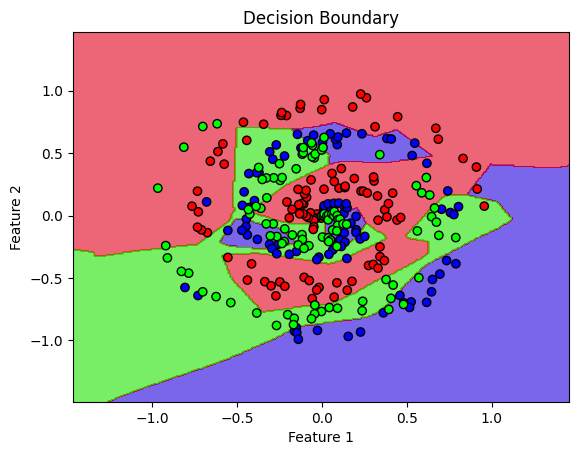

In [48]:
import matplotlib.pyplot as plt
X , y = spiral_data(samples = 100 , classes = 3)
dense1 = layer_dense(2,64)
activation1= activation_reLU()
dense2=layer_dense(64,3)

loss_function= Activation_softmax_Loss_CategoricalCrossentropy()

optimizer = optimizer_SGD(decay=1e-3)

# Train in loop
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.outputs)

    loss = loss_function.forward(dense2.output, y)

    predictions = np.argmax(loss_function.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_function.backward(loss_function.output, y)
    dense2.backward(loss_function.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass on the grid
dense1.forward(grid)
activation1.forward(dense1.output)
dense2.forward(activation1.outputs)
loss_function.activation.forward(dense2.output)

# Get predictions
predictions = np.argmax(loss_function.activation.output, axis=1)
predictions = predictions.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, predictions, cmap='brg', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [55]:
# optimizer adagrad - not used now
class optimizer_adagrad:
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))
            
    def update_parameters(self,layer):
        # If layer does not contain cache arrays, create them filled with zeros
        if not hasattr(layer , 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        layer.weights += -self.current_learning_rate * \
            layer.dweights / \
            (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
            layer.dbiases / \
            (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_parameters(self):
        self.iterations +=1
            
        
        

epoch: 0, acc: 0.353, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.447, loss: 0.996, lr: 0.9901970492127933
epoch: 200, acc: 0.493, loss: 0.945, lr: 0.9804882831650161
epoch: 300, acc: 0.503, loss: 0.920, lr: 0.9709680551509855
epoch: 400, acc: 0.557, loss: 0.884, lr: 0.9616309260505818
epoch: 500, acc: 0.577, loss: 0.838, lr: 0.9524716639679969
epoch: 600, acc: 0.633, loss: 0.824, lr: 0.9434852344560807
epoch: 700, acc: 0.673, loss: 0.772, lr: 0.9346667912889054
epoch: 800, acc: 0.663, loss: 0.738, lr: 0.9260116677470135
epoch: 900, acc: 0.670, loss: 0.720, lr: 0.9175153683824203
epoch: 1000, acc: 0.683, loss: 0.693, lr: 0.9091735612328392
epoch: 1100, acc: 0.707, loss: 0.686, lr: 0.9009820704567978
epoch: 1200, acc: 0.687, loss: 0.670, lr: 0.892936869363336
epoch: 1300, acc: 0.697, loss: 0.657, lr: 0.8850340738118416
epoch: 1400, acc: 0.717, loss: 0.639, lr: 0.8772699359592947
epoch: 1500, acc: 0.720, loss: 0.630, lr: 0.8696408383337683
epoch: 1600, acc: 0.737, loss: 0.620, lr: 0.86214328

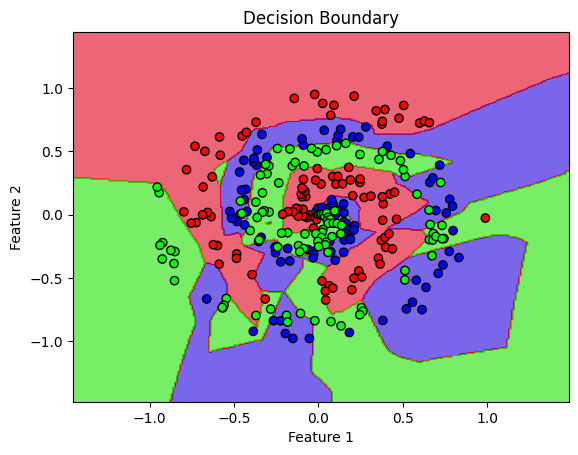

In [57]:
import matplotlib.pyplot as plt
import numpy as np

X , y = spiral_data(samples = 100 , classes = 3)
dense1 = layer_dense(2,64)
activation1= activation_reLU()
dense2=layer_dense(64,3)

loss_function= Activation_softmax_Loss_CategoricalCrossentropy()

optimizer = optimizer_adagrad(decay=1e-4)

# Train in loop
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.outputs)

    loss = loss_function.forward(dense2.output, y)

    predictions = np.argmax(loss_function.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_function.backward(loss_function.output, y)
    dense2.backward(loss_function.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass on the grid
dense1.forward(grid)
activation1.forward(dense1.output)
dense2.forward(activation1.outputs)
loss_function.activation.forward(dense2.output)

# Get predictions
predictions = np.argmax(loss_function.activation.output, axis=1)
predictions = predictions.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, predictions, cmap='brg', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [58]:
# optimizer rsmprop
class optimizer_RSMprop:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7 , rho = 0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))
            
    def update_parameters(self,layer):
        # If layer does not contain cache arrays, create them filled with zeros
        if not hasattr(layer , 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_cache = self.rho * layer.weight_cache + \
                            ( 1 - self.rho ) * layer.dweights**2
            
                            
        layer.bias_cache = self.rho * layer.bias_cache + \
                            ( 1 - self.rho ) * layer.dbiases**2

        layer.weights += -self.current_learning_rate * \
            layer.dweights / \
            (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
            layer.dbiases / \
            (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_parameters(self):
        self.iterations +=1

epoch: 0, acc: 0.420, loss: 1.099, lr: 0.02
epoch: 100, acc: 0.463, loss: 0.965, lr: 0.01998021958261321
epoch: 200, acc: 0.527, loss: 0.931, lr: 0.019960279044701046
epoch: 300, acc: 0.607, loss: 0.879, lr: 0.019940378268975763
epoch: 400, acc: 0.573, loss: 0.851, lr: 0.01992051713662487
epoch: 500, acc: 0.617, loss: 0.833, lr: 0.01990069552930875
epoch: 600, acc: 0.590, loss: 0.794, lr: 0.019880913329158343
epoch: 700, acc: 0.657, loss: 0.763, lr: 0.019861170418772778
epoch: 800, acc: 0.663, loss: 0.758, lr: 0.019841466681217078
epoch: 900, acc: 0.630, loss: 0.765, lr: 0.01982180200001982
epoch: 1000, acc: 0.640, loss: 0.738, lr: 0.019802176259170884
epoch: 1100, acc: 0.633, loss: 0.711, lr: 0.01978258934311912
epoch: 1200, acc: 0.657, loss: 0.715, lr: 0.01976304113677013
epoch: 1300, acc: 0.680, loss: 0.682, lr: 0.019743531525483964
epoch: 1400, acc: 0.683, loss: 0.697, lr: 0.01972406039507293
epoch: 1500, acc: 0.677, loss: 0.687, lr: 0.019704627631799327
epoch: 1600, acc: 0.697, lo

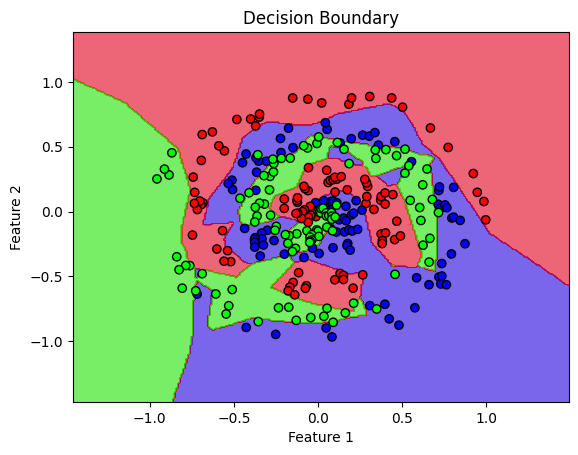

In [65]:
import matplotlib.pyplot as plt
import numpy as np

X , y = spiral_data(samples = 100 , classes = 3)
dense1 = layer_dense(2,64)
activation1= activation_reLU()
dense2=layer_dense(64,3)

loss_function= Activation_softmax_Loss_CategoricalCrossentropy()

optimizer = optimizer_RSMprop(learning_rate = 0.02 , decay = 1e-5 , rho=0.999)

# Train in loop
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.outputs)

    loss = loss_function.forward(dense2.output, y)

    predictions = np.argmax(loss_function.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_function.backward(loss_function.output, y)
    dense2.backward(loss_function.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass on the grid
dense1.forward(grid)
activation1.forward(dense1.output)
dense2.forward(activation1.outputs)
loss_function.activation.forward(dense2.output)

# Get predictions
predictions = np.argmax(loss_function.activation.output, axis=1)
predictions = predictions.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, predictions, cmap='brg', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [71]:
# best optimizer: adam
class optimizer_adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7 , beta1=0.9 , beta2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2

    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    def update_parameters(self, layer):
        # Create momentum and cache arrays if they don't exist
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentums with current gradients
        layer.weight_momentums = self.beta1 * layer.weight_momentums + (1 - self.beta1) * layer.dweights
        layer.bias_momentums = self.beta1 * layer.bias_momentums + (1 - self.beta1) * layer.dbiases

        # Correct momentums
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta1 ** (self.iterations + 1))

        # Update cache with squared gradients
        layer.weight_cache = self.beta2 * layer.weight_cache + (1 - self.beta2) * layer.dweights ** 2
        layer.bias_cache = self.beta2 * layer.bias_cache + (1 - self.beta2) * layer.dbiases ** 2

        # Correct cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta2 ** (self.iterations + 1))

        # Apply Adam update
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_parameters(self):
        self.iterations += 1
   

epoch: 0, acc: 0.267, loss: 1.099, lr: 0.02
epoch: 100, acc: 0.523, loss: 0.922, lr: 0.01998021958261321
epoch: 200, acc: 0.693, loss: 0.715, lr: 0.019960279044701046
epoch: 300, acc: 0.763, loss: 0.575, lr: 0.019940378268975763
epoch: 400, acc: 0.817, loss: 0.483, lr: 0.01992051713662487
epoch: 500, acc: 0.813, loss: 0.439, lr: 0.01990069552930875
epoch: 600, acc: 0.823, loss: 0.404, lr: 0.019880913329158343
epoch: 700, acc: 0.840, loss: 0.374, lr: 0.019861170418772778
epoch: 800, acc: 0.853, loss: 0.350, lr: 0.019841466681217078
epoch: 900, acc: 0.857, loss: 0.329, lr: 0.01982180200001982
epoch: 1000, acc: 0.873, loss: 0.309, lr: 0.019802176259170884
epoch: 1100, acc: 0.897, loss: 0.291, lr: 0.01978258934311912
epoch: 1200, acc: 0.903, loss: 0.275, lr: 0.01976304113677013
epoch: 1300, acc: 0.903, loss: 0.261, lr: 0.019743531525483964
epoch: 1400, acc: 0.910, loss: 0.249, lr: 0.01972406039507293
epoch: 1500, acc: 0.913, loss: 0.238, lr: 0.019704627631799327
epoch: 1600, acc: 0.923, lo

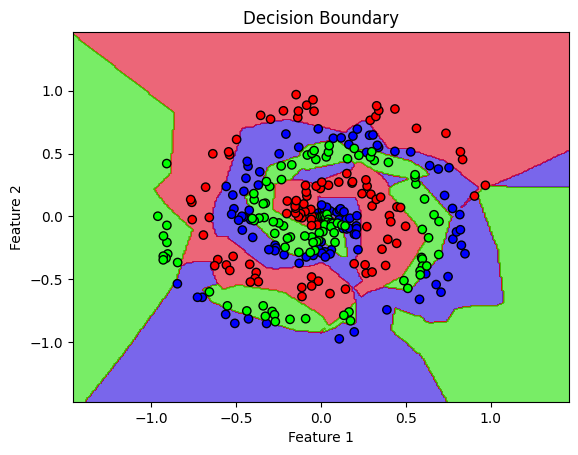

In [73]:
import matplotlib.pyplot as plt
import numpy as np

X , y = spiral_data(samples = 100 , classes = 3)
dense1 = layer_dense(2,64)
activation1= activation_reLU()
dense2=layer_dense(64,3)

loss_function= Activation_softmax_Loss_CategoricalCrossentropy()

optimizer = optimizer_adam(learning_rate = 0.02 , decay = 1e-5 )

# Train in loop
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.outputs)

    loss = loss_function.forward(dense2.output, y)

    predictions = np.argmax(loss_function.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_function.backward(loss_function.output, y)
    dense2.backward(loss_function.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass on the grid
dense1.forward(grid)
activation1.forward(dense1.output)
dense2.forward(activation1.outputs)
loss_function.activation.forward(dense2.output)

# Get predictions
predictions = np.argmax(loss_function.activation.output, axis=1)
predictions = predictions.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, predictions, cmap='brg', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# accuracy on training data 
#  adam : 0.96 
# rmsprop : 0.88
# momentum : 0.63
# sgd: 0.65

In [3]:
# our nn should also perform good on testing data
X_test, y_test = spiral_data(samples=100, classes=3)
dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.outputs)
loss = loss_function.forward(dense2.output ,y_test)
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
 y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

NameError: name 'dense1' is not defined